In [1]:
import pickle as cp
import pandas as pd
import gensim
import logging
import random
import numpy as np
import json 
import re
import os.path
import matplotlib.pyplot as plt


/home/tamim/anaconda3/lib/python3.5/site-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


In [2]:
alltxt = cp.load(open('sachalCorpus.pkl','rb'))


In [3]:
import string
transtable = str.maketrans(' ', ' ', string.punctuation)
sentences = []

In [4]:
if(not os.path.isfile('gensimWordVec')): 
    for txt in alltxt:
        curSentences = txt.split('।')
        for sentence in curSentences:
            if(len(sentence.strip()) != 0):
                sentences.append(sentence.split())

In [5]:
def readComments(f_name):
    if(os.path.isfile('gensimWordVec')):
        return []
    comments = []
    f_in = open(f_name)
    while True:
        s = f_in.readline()
        if s == '':
            break
        else:
            comments.append(s.strip().split())
    return comments

In [6]:
sentences += readComments('cleanedCommentsProthomAlo.txt')
sentences += readComments('cleanedCommentsSachal.txt')

# We collect sentences from prothom-alo articles too here

In [7]:
def parseProthomAloArticles():
    if(os.path.isfile('gensimWordVec')):
        return []
    f_in = open('scraped_prothomAloArticles.json')
    sentences = []
    while True:
        s = f_in.readline()
        if s == '':
            break
        else:
            sJson = json.loads(s)
            curSentences = sJson['article'].split('।')
            for sentence in curSentences:
                sentences.append(sentence.split())
    return sentences
            
    
    

In [8]:
sentences += parseProthomAloArticles()

In [10]:
tokens = 0
for s in sentences:
    tokens+=len(s)
    
print("No of tokens, ",tokens)

No of tokens,  33081794


In [11]:
vectorLen = 100

In [12]:
def genWordModel():
    if(os.path.isfile('gensimWordVec')):
        return gensim.models.Word2Vec.load('gensimWordVec')
    else:
        wordModel = gensim.models.Word2Vec(sentences=sentences, size=vectorLen, min_count=1, window= 4, workers=4)
        wordModel.save('gensimWordVec')
        return wordModel

In [13]:
wordModel = genWordModel()

In [14]:
wordModel.most_similar('পুরুষ')

[('নারী', 0.7931123971939087),
 ('পুরুষ,', 0.7262457609176636),
 ('নারী,', 0.7107799053192139),
 ('পুরুষের', 0.6979084014892578),
 ('পুরুষকে', 0.6611655950546265),
 ('এ’রম', 0.6459627151489258),
 ('পান্থজন', 0.6451367735862732),
 ('নারী-পুরুষ', 0.6440507173538208),
 ('শিশু,', 0.6433746814727783),
 ('শিশুসহ', 0.6379339694976807)]

In [15]:
wordModel.most_similar('খেলা')

[('খেলাটা', 0.7662200927734375),
 ('ফুটবল', 0.7113726139068604),
 ('ম্যাচ', 0.7075428366661072),
 ('খেলাই', 0.7022793292999268),
 ('খেলাও', 0.6957393884658813),
 ('ম্যাচটি', 0.6593891382217407),
 ('ক্রিকেট', 0.6467001438140869),
 ('তাস', 0.6449255347251892),
 ('বিশ্বকাপ', 0.644912838935852),
 ('তামাশা', 0.633206844329834)]

In [16]:
wordModel.most_similar('সুন্দর')

[('চমৎকার', 0.7970105409622192),
 ('সুন্দর,', 0.7072076201438904),
 ('অসাধারন', 0.6761439442634583),
 ('চমতকার', 0.655440628528595),
 ('অসাধারণ', 0.6530945897102356),
 ('গোছানো', 0.647397518157959),
 ('সুন্দর!', 0.6361888647079468),
 ('অপূর্ব', 0.630119800567627),
 ('অদ্ভুত', 0.6280200481414795),
 ('চমত্কার', 0.6265210509300232)]

In [17]:
wordModel.most_similar('খারাপ')

[('ভাল', 0.7988693714141846),
 ('ভালো', 0.7923136949539185),
 ('ভালো', 0.7509987354278564),
 ('মন্দ', 0.6510046124458313),
 ('খারাপই', 0.6492986083030701),
 ('খ্রাপ', 0.6488841772079468),
 ('খারপ', 0.647308886051178),
 ('খারাপ,', 0.6404173374176025),
 ('বাজে', 0.6337137818336487),
 ('বোরিং', 0.6142040491104126)]

In [18]:
wordModel.doesnt_match("মানুষ গরু ছাগল মহিষ".split())

'মানুষ'

In [19]:
wordModel.doesnt_match("বাংলাদেশ ভারত পাকিস্তান ব্রাজিল".split())

'ব্রাজিল'

In [20]:
wordModel.most_similar('সরকার')

[('সরকারব্যবস্থা', 0.8121378421783447),
 ('সরকারকে', 0.8089427947998047),
 ('সরকারও', 0.7917607426643372),
 ('সরকারের', 0.7752299904823303),
 ('সেনাবাহিনী', 0.7590380907058716),
 ('প্রশাসন', 0.754774808883667),
 ('সরকারই', 0.7500436305999756),
 ('কমিশন', 0.7457376718521118),
 ('বিএনপি', 0.7270811796188354),
 ('সরকারব্যবস্থার', 0.7249953150749207)]

In [21]:
df = pd.read_csv('AnnotatedComments.csv')

In [22]:
def findMaxOccur(id,df):
    cntDict = {'positive':0,'negative':0,'neutral':0,'ambiguous':0}
    n_row = {'id':id}
    for index,row in df.iterrows():
        cntDict[row['annotation']]+=1
        n_row['comment'] = row['comment']
        
    if cntDict['positive']>=1:
        n_row['annotation'] = 'positive'
    elif cntDict['negative']>=1:
        n_row['annotation'] = 'negative'
    else:
        n_row = None
    return n_row
    
    
    

def mergeDuplicates(original_df):
    grouped = original_df.groupby('id')
    mergedDf = pd.DataFrame(columns=['comment','annotation'])
    cnt = 0
    for id,df in grouped:
        if(len(df) == 1):
            cnt+=1
        n_row = findMaxOccur(id,df)
        if n_row:
            mergedDf = mergedDf.append(n_row,ignore_index=True)
    print('single comments ',cnt)
    return mergedDf[['comment','annotation']]


In [23]:
df = mergeDuplicates(df)

single comments  8120


In [24]:
df['annotation'] = df['annotation'].apply(lambda sentiment: 1 if sentiment=='positive' else 0 )

In [25]:
print(len(df))
print("positive",len(df[df['annotation']==1]))
print("negative",len(df[df['annotation']==0]))

8511
positive 3903
negative 4608


In [26]:
def createTrainTest(df,splitRatio):
    df = df.sample(frac=1).sample(frac=1)
    idx = int(splitRatio*len(df))
    df2 = pd.read_csv('manual')
    df2['annotation'] = df2['annotation'].apply(lambda sentiment: 1 if sentiment=='positive' else 0 )
    upperHalf = df[0:idx].append(df2).sample(frac=1)
    lowerHalf = df[idx:]
    X_train = upperHalf['comment']
    X_test = lowerHalf['comment']
    y_train = upperHalf['annotation']
    y_test = lowerHalf['annotation']
    
    
    return np.array(X_train),np.array(X_test),np.array(y_train),np.array(y_test)
    
    
    

In [27]:
splitRatio = .9
X_train,X_test,y_train,y_test = createTrainTest(df,splitRatio)
X_test_cpy = X_test

In [28]:
def padZeroRow(wordModel,comment,maxLen,vectorLen):
    row = []
    commentList = comment.split() #split into words
    minIdx = min(len(commentList),maxLen)
    for i in range(0,minIdx):
        if commentList[i] in wordModel:
            row.append(wordModel[commentList[i]])
        else:
            row.append(np.zeros(vectorLen))
        
    for i in range(minIdx,maxLen):
        row.append(np.zeros(vectorLen))
    return row
    
    
    

def padZeros(wordModel,X,maxLen,vectorLen):
    
    newX = []
    for comment in X:
        row = padZeroRow(wordModel,comment,maxLen,vectorLen)
        newX.append(row)

        
    return np.array(newX)

    
    
    
    
    

In [29]:
stepSize = 15
X_train = padZeros(wordModel,X_train,stepSize,vectorLen)
X_test =  padZeros(wordModel,X_test,stepSize,vectorLen)

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.regularizers import l2, activity_l2

Using TensorFlow backend.


In [31]:
model = Sequential()

In [32]:
model.add(LSTM(100,input_shape =(stepSize,vectorLen),return_sequences=True))
model.add(LSTM(50))
model.add(Dropout(.4))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lstm_1 (LSTM)                    (None, 15, 100)       80400       lstm_input_1[0][0]               
____________________________________________________________________________________________________
lstm_2 (LSTM)                    (None, 50)            30200       lstm_1[0][0]                     
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 50)            0           lstm_2[0][0]                     
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 1)             51          dropout_1[0][0]                  
Total params: 110651
______________________________________________________________________

In [33]:
batch_size=64
epochs=10
verbose=True
validation_split=.1
patience = 1
early_stopping = EarlyStopping(monitor='val_loss', patience=patience, verbose=verbose)

In [34]:
model.fit(X_train, 
            y_train, 
            batch_size=batch_size, 
            nb_epoch=epochs,
            verbose=verbose,
            validation_split=validation_split, 
            callbacks=[early_stopping])


Train on 6964 samples, validate on 774 samples
Epoch 1/10
6964/6964 [==============================] - 5s - loss: 0.5830 - acc: 0.6973 - val_loss: 0.5449 - val_acc: 0.7067
Epoch 2/10
6964/6964 [==============================] - 4s - loss: 0.5019 - acc: 0.7606 - val_loss: 0.5316 - val_acc: 0.7351
Epoch 3/10
6964/6964 [==============================] - 4s - loss: 0.4528 - acc: 0.7935 - val_loss: 0.5267 - val_acc: 0.7403
Epoch 4/10
6964/6964 [==============================] - 4s - loss: 0.3914 - acc: 0.8267 - val_loss: 0.5594 - val_acc: 0.7248
Epoch 5/10
6964/6964 [==============================] - 4s - loss: 0.3266 - acc: 0.8621 - val_loss: 0.6200 - val_acc: 0.7248


In [35]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 74.06%


In [36]:
def pltPartByPart(s):
    
    
    l = s.split()
    x_ticks = l
    x = np.array(range(len(l)))
    y = []
    for i in range(1,len(l)+1):
        curStr = [' '.join(l[:i])]
        curStr = padZeros(wordModel,curStr,stepSize,vectorLen)
        y.append(model.predict(curStr)[0][0])
      
    print(x_ticks)
    print(y)
    print(x)
        
    plt.xticks(x, x_ticks)
    plt.plot(x, y)
    plt.show()
    return
        

In [37]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family='Nikosh')
import numpy as np
%matplotlib inline

['শুরুতে', 'একটু', 'ভাল', 'লাগলেও', 'পরে', 'বিরক্তি', 'ধরে', 'গেছে']
[0.99196339, 0.98933488, 0.99640298, 0.99626678, 0.9933514, 0.85456461, 0.99557847, 0.9248423]
[0 1 2 3 4 5 6 7]


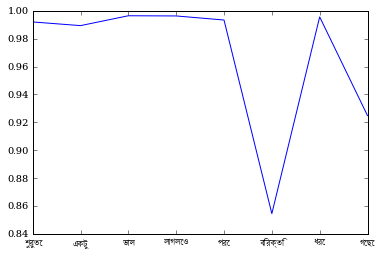

In [40]:
pltPartByPart('শুরুতে একটু ভাল লাগলেও পরে বিরক্তি ধরে গেছে')

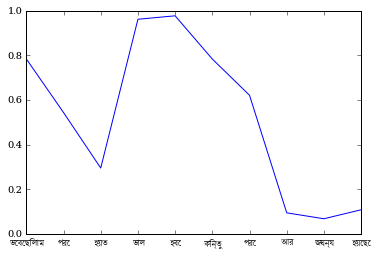

In [39]:
x_ticks = ['ভেবেছিলাম', 'পরে', 'হয়ত', 'ভাল', 'হবে', 'কিন্তু', 'পরে', 'আর', 'জঘন্য', 'হয়েছে']
x = np.array(range(10))
y = [0.78421855, 0.54401094, 0.29537833, 0.96193033, 0.97741461, 0.78365964, 0.62142026, 0.094572492, 0.068140224, 0.10831796]
plt.xticks(x, x_ticks)
plt.plot(x, y)
plt.show()

In [ ]:
x_ticks = ['শুরুতে', 'একটু', 'ভাল', 'লাগলেও', 'পরে', 'বিরক্তি', 'ধরে', 'গেছে']
x = np.array(range(8))
y = [0.75012034, 0.41449672, 0.95646137, 0.91476071, 0.34031066, 0.22273718, 0.45985109, 0.32197201]
plt.xticks(x, x_ticks)
plt.plot(x, y)
plt.show()

In [ ]:
x_ticks = ['বইটা', 'প্রথমদিকে', 'অনেক', 'বোরিং', 'ছিল', 'কিন্তু', 'পরের', 'দিকে', 'খুব', 'চমৎকার', 'লেগেছে']
x = np.array(range(11))
y = [0.90483016, 0.85280257, 0.83823037, 0.67966586, 0.28847075, 0.26739812, 0.38455793, 0.28380302, 0.47014257, 0.89239806, 0.92168832]
plt.xticks(x, x_ticks)
plt.plot(x, y)
plt.show()

In [ ]:
my_test = padZeros(wordModel,my_test,stepSize,vectorLen)

In [ ]:
model.predict(my_test)

In [ ]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

from keras.layers import Input, Dense,Lambda,Convolution1D,MaxPooling1D,TimeDistributed
from keras.models import Model
from keras.layers import LSTM, Lambda, merge, Masking
import tensorflow as tf


docs = []
sentences = []
sentiments = []
for index, row in df.iterrows():
    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', row['comment'])
    docs.append(sentences)
    sentiments.append(row['annotation'])

txt = ''
for doc in docs:
    for s in doc:
        txt += s
chars = set(txt)
print('total chars:', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))


maxlen = 100
max_sentences = 15

X = np.ones((len(docs), max_sentences, maxlen), dtype=np.int64) * -1
y = np.array(sentiments)

for i, doc in enumerate(docs):
    for j, sentence in enumerate(doc):
        if j < max_sentences:
            for t, char in enumerate(sentence[-maxlen:]):
                X[i, j, (maxlen-1-t)] = char_indices[char]

def binarize_outshape(in_shape):
    return in_shape[0], in_shape[1], 71

def binarize(x, sz=71):
    return tf.to_float(tf.one_hot(x, sz, on_value=1, off_value=0, axis=-1))

filter_length = [5, 3, 3]
nb_filter = [196, 196, 256]
pool_length = 2

in_sentence = Input(shape=(maxlen,), dtype='int64')
# binarize function creates a onehot encoding of each character index
embedded = Lambda(binarize, output_shape=binarize_outshape)(in_sentence)

for i in range(len(nb_filter)):
    embedded = Convolution1D(nb_filter=nb_filter[i],
                            filter_length=filter_length[i],
                            border_mode='valid',
                            activation='relu',
                            init='glorot_normal',
                            subsample_length=1)(embedded)

    embedded = Dropout(0.1)(embedded)
    embedded = MaxPooling1D(pool_length=pool_length)(embedded)

forward_sent = LSTM(128, return_sequences=False, dropout_W=0.2, dropout_U=0.2, consume_less='gpu')(embedded)
backward_sent = LSTM(128, return_sequences=False, dropout_W=0.2, dropout_U=0.2, consume_less='gpu', go_backwards=True)(embedded)

sent_encode = merge([forward_sent, backward_sent], mode='concat', concat_axis=-1)
sent_encode = Dropout(0.3)(sent_encode)

encoder = Model(input=in_sentence, output=sent_encode)

forward_sent = LSTM(128, return_sequences=False, dropout_W=0.2, dropout_U=0.2, consume_less='gpu')(embedded)
backward_sent = LSTM(128, return_sequences=False, dropout_W=0.2, dropout_U=0.2, consume_less='gpu', go_backwards=True)(embedded)

sequence = Input(shape=(max_sentences, maxlen), dtype='int64')
encoded = TimeDistributed(encoder)(sequence)
forwards = LSTM(80, return_sequences=False, dropout_W=0.2, dropout_U=0.2, consume_less='gpu')(encoded)
backwards = LSTM(80, return_sequences=False, dropout_W=0.2, dropout_U=0.2, consume_less='gpu', go_backwards=True)(encoded)

merged = merge([forwards, backwards], mode='concat', concat_axis=-1)
output = Dropout(0.3)(merged)
output = Dense(128, activation='relu')(output)
output = Dropout(0.3)(output)
output = Dense(1, activation='sigmoid')(output)

model = Model(input=sequence, output=output)

ids = np.arange(len(X))
np.random.shuffle(ids)
idx = int(splitRatio*len(df))
# shuffle
X = X[ids]
y = y[ids]

X_train = X[:idx]
X_test = X[idx:]

y_train = y[:idx]
y_test = y[idx:]


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, 
            y_train, 
            batch_size=batch_size, 
            nb_epoch=epochs,
            verbose=verbose,
            validation_split=validation_split, 
            callbacks=[early_stopping])


In [ ]:
path = '/usr/share/fonts/Siyamrupali.ttf'
prop = matplotlib.font_manager.FontProperties(fname=path)
matplotlib.rcParams['font.family'] = prop.get_name()
pltPartByPart('ভেবেছিলাম পরে হয়ত ভাল হবে কিন্তু পরে আর জঘন্য হয়েছে')

In [ ]:
import matplotlib.font_manager
[f.name for f in matplotlib.font_manager.fontManager.ttflist]
